# Hierarchical Clustering
Sklearn supports Agglomerative Hierarchical clustering.  
It does not produce nice dendrograms - we will use `scipi` for that. 

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

X = np.array([[5,3],
             [10,15],
             [15,12],
             [24,10],
             [30,30],
             [65,70],
             [51,80],
             [40,78],
             [50,55],
             [60,91],])
clustering = AgglomerativeClustering(n_clusters=4, linkage = 'average').fit(X)
clustering

AgglomerativeClustering(linkage='average', n_clusters=4)

In [2]:
clustering.labels_

array([3, 3, 3, 3, 2, 0, 1, 1, 0, 1])

The `children_` attribute shows the nodes in the tree but interpreting it is hard work. 

In [3]:
clustering.children_

array([[ 1,  2],
       [ 6,  7],
       [ 3, 10],
       [ 0, 12],
       [ 9, 11],
       [ 5,  8],
       [14, 15],
       [ 4, 13],
       [16, 17]])

## Dendrograms

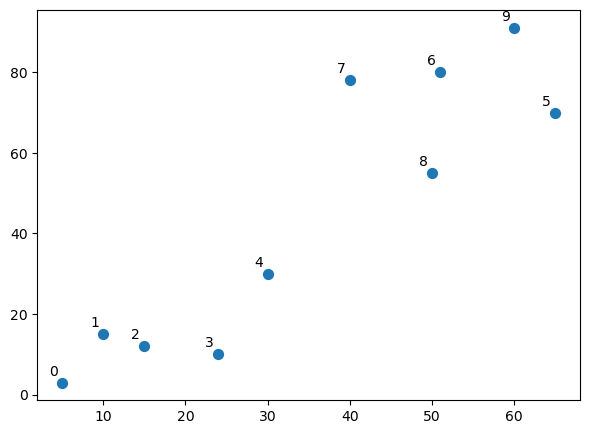

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = range(10)
plt.figure(figsize=(7, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position', s = 50)

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

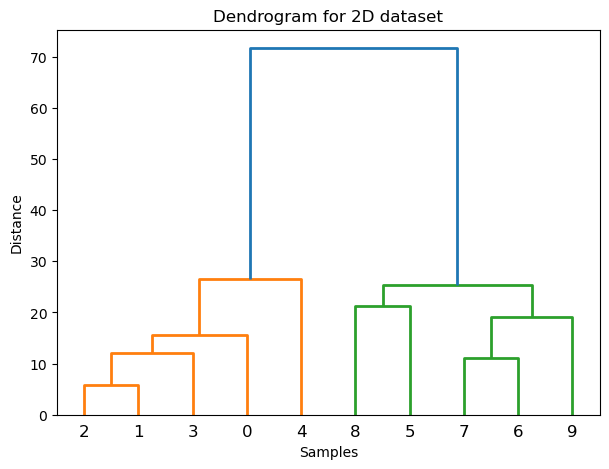

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['lines.linewidth'] = 2

linked = linkage(X, 'average')

labelList = range(10)

plt.figure(figsize=(7, 5))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for 2D dataset')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [6]:
len(linked)

9

## Top Trumps
`HarryPotterTT.csv` contains data on Top Trumps cards.  
This is an insightful example of clustering because some of the clusters are meaningful and some are not.   

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('HarryPotterTT.csv')
TT_df.head()

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7


In [8]:
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape

(22, 5)

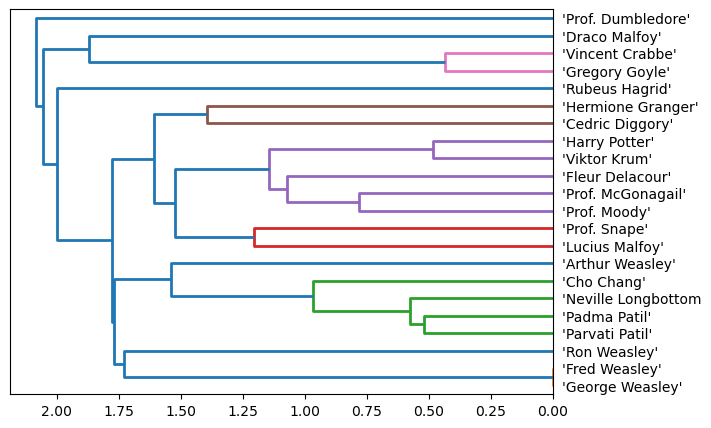

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_scal, 'single')

labelList = list(y)

plt.figure(figsize=(7, 5))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True
          )
plt.show()

# Single versus Average linkage
Single linkage hierarchical clustering does well on the half-moons dataset.
## Moons Synthetic Dataset
1,000 samples, 2 classes.

In [10]:
from sklearn.datasets import make_moons
moons_data = make_moons(n_samples=1000, noise=0.07, random_state=0)
moons = pd.DataFrame(data=moons_data[0], columns=['x', 'y'])
moons['label_truth'] = moons_data[1]

moons.plot(
    kind='scatter',
    x='x',
    y='y',
    figsize=(4,3),
    s=10,
    alpha=0.7);

### Average Linkage
Does not work well

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, linkage = 'average')
hc.fit(moons[['x', 'y']]);

In [12]:
cm = {0 : 'g', 1 : 'pink'}
label_color = [cm[l] for l in hc.labels_]
moons.plot(
    kind='scatter', x='x', y='y', figsize=(4,3), s=10,c=label_color);

### Single Linkage
Works well, can accommodate long stringy clusters.

In [13]:
hc_s = AgglomerativeClustering(n_clusters=2, linkage = 'single')
hc_s.fit(moons[['x', 'y']]);

In [14]:
cm = {0 : 'silver', 1 : 'black'}
label_color = [cm[l] for l in hc_s.labels_]
moons.plot(
    kind='scatter', x='x', y='y', figsize=(4,3), s=10,c=label_color);

# Divisive Hierarchical Clustering
Scikit Learn doesn't support Divisive Hierarchical Clustering